# Practical 6
# Multilayer Perceptron with Backpropagation using Keras and TensorFlow

In [19]:
#Import statements
# using inbuilt dataset MNIST dataset ( handwritten digits 0-9)
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [20]:
# Load and Prepare the Data
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to [0, 1] range
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [21]:
# build MLP Model
# Build a simple MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D vectors
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),   # Second hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons (one per class) and softmax activation
])


In [22]:
#Compile the Model
model.compile(optimizer='sgd',               # sgd optimizer
              loss='categorical_crossentropy', # Loss function for multi-class classification
              metrics=['accuracy'])            # Metric to monitor


In [23]:
# Train the Model
# Train the model with backpropagation
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6381 - loss: 1.2421 - val_accuracy: 0.9058 - val_loss: 0.3398
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9023 - loss: 0.3458 - val_accuracy: 0.9213 - val_loss: 0.2727
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9199 - loss: 0.2758 - val_accuracy: 0.9300 - val_loss: 0.2359
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9297 - loss: 0.2390 - val_accuracy: 0.9404 - val_loss: 0.2098
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9408 - loss: 0.2111 - val_accuracy: 0.9473 - val_loss: 0.1887
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9455 - loss: 0.1866 - val_accuracy: 0.9505 - val_loss: 0.1753
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9509 - loss: 0.1714 - val_accuracy: 0.9524 - val_loss: 0.1692
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9544 - loss: 0.1571 - 

In [27]:
# Evaluate the Model
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')w


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.9528 - loss: 0.1633
Test accuracy: 0.9585


# Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted class for sample 0: 7
Actual class for sample 0: 7


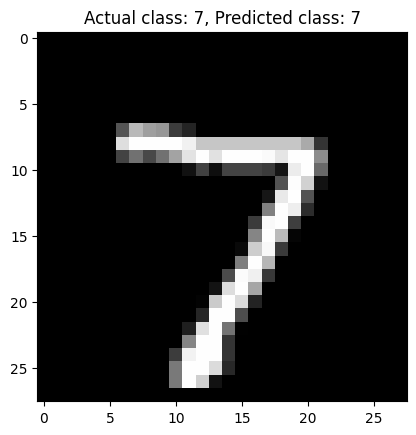

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the previous code is already executed, we can directly proceed to prediction.

# Select a single sample from the test set
sample_index = 0  # Change this index to test different samples
x_sample = x_test[sample_index:sample_index + 1]  # Ensure the shape is (1, 28, 28)

# Predict the class of the sample
prediction = model.predict(x_sample)

# Convert the prediction to a class label
predicted_class = np.argmax(prediction, axis=1)
actual_class = np.argmax(y_test[sample_index])

# Print the prediction results
print(f'Predicted class for sample {sample_index}: {predicted_class[0]}')
print(f'Actual class for sample {sample_index}: {actual_class}')

# Display the sample image
plt.imshow(x_test[sample_index], cmap='gray')
plt.title(f'Actual class: {actual_class}, Predicted class: {predicted_class[0]}')
plt.show()


# By Ashish Vinod IT154